# Emoji Prediction

### Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [17]:
train_txt_raw = open('data/us_train.text','r',encoding="utf8")
train_labels_raw = open('data/us_train.labels','r',encoding="utf8")

train_txt = []
train_labels = []

for sentence in train_txt_raw:
    sentence = sentence.rstrip()
    train_txt.append(sentence)
    
for sentence in train_labels_raw:
    sentence = sentence.rstrip()
    sentence = int(sentence)
    train_labels.append(sentence)


df = pd.DataFrame()
df["Tweet"] = train_txt
df["Label"] = train_labels

In [21]:
df.head(10)

,Tweet,Label
0,A little throwback with my favourite person @ ...,0
1,glam on @user yesterday for #kcon makeup using...,7
2,Democracy Plaza in the wake of a stunning outc...,11
3,Then &amp; Now. VILO @ Walt Disney Magic Kingdom,0
4,Who never... @ A Galaxy Far Far Away,2
5,Dinner in FLA tonight // Pan-seared salmon ove...,1
6,It's my fav seniors last game congrats on beat...,8
7,I got to to go formal with my best friend @ Ph...,0
8,'Cause I Miss My Little Homies .#Throwback #Co...,13
9,"Birthday Kisses @ Madison, Wisconsin",9


### Emoji mapping

In [10]:
emoji_raw = open('data/us_mapping.txt','r',encoding="utf8")

emojis=[]
for sentence in emoji_raw:
    print(sentence)
    sentence = sentence.rstrip()
    emojis.append(sentence)

mapp = []
emos = []
sent = []

for e in emojis:
    mapp.append(e.split()[0])
    emos.append(e.split()[1])
    sent.append(" ".join(e.split()[2:]))

df_em = pd.DataFrame({'Label':mapp})
df_em["Emoji"] = emos
df_em["Description"] = sent

0	❤️	 Red heart	

1	😍	 Smiling face with hearteyes	

2	😂	 Face with tears of joy	

3	💕	 Two hearts

4	🔥	 Fire

5	😊	 Smiling face with smiling eyes	

6	😎	 Smiling face with sunglasses	

7	✨	 Sparkles 	

8	💙	 Blue heart

9	😘	 Face blowing a kiss	

10	📷	 Camera	

11	🇺🇸	 United States	

12	☀️	 Sun

13	💜	 Purple heart 	

14	😉	 Winking face	

15	💯	 Hundred points	

16	😁	 Beaming face with smiling eyes	

17	🎄	Christmas tree	

18	📸	Camera with flash

19	😜	Winking face with tongue	



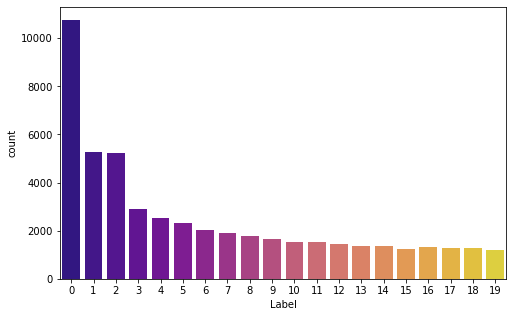

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(x="Label", data=df, palette="plasma")
plt.show()

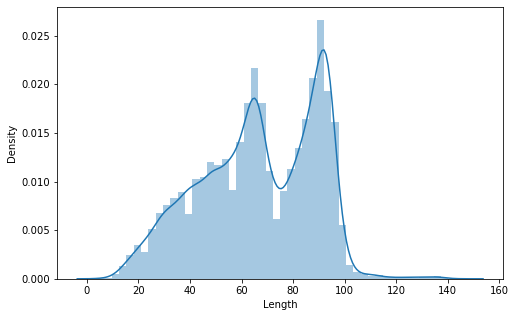

In [45]:
import warnings
warnings.filterwarnings(action='ignore')

plt.figure(figsize=(8,5))
df["Length"] = df["Tweet"].apply(len)
sns.distplot(df["Length"])
plt.show()

In [46]:
df.describe()

,Label,Length
count,50000.000000,50000.000000
mean,5.903680,66.645380
std,5.851024,22.514753
min,0.000000,4.000000
25%,1.000000,50.000000
50%,4.000000,67.000000
75%,10.000000,87.000000
max,19.000000,146.000000
